In [39]:
import matplotlib.pyplot as plt
import pandas as pd
from glob import glob
import cmocean
import altair

Load the pickled dataframes

In [14]:
files = glob('./data_dump/*')
df = pd.read_pickle(files[0])
df['month'] = df['dateTime'].dt.month
df.head()

,conductivity,pressure,temp,practical_salinity,density,time,dateTime,month
dateTime,,,,,,,,
2015-02-18 21:00:00,3.508060,11.91500,7.612367,34.158499,1026.726007,1.424295e+18,2015-02-18 21:00:00,2
2015-02-18 22:00:00,3.508925,12.09175,7.622875,34.157441,1026.724470,1.424298e+18,2015-02-18 22:00:00,2
2015-02-18 23:00:00,3.508865,12.61875,7.621725,34.157666,1026.727226,1.424302e+18,2015-02-18 23:00:00,2
2015-02-19 00:00:00,3.508758,12.34900,7.620175,34.158158,1026.726601,1.424305e+18,2015-02-19 00:00:00,2
2015-02-19 01:00:00,3.508492,12.54900,7.616800,34.158511,1026.728280,1.424309e+18,2015-02-19 01:00:00,2


Text(0,0.5,'Temp')

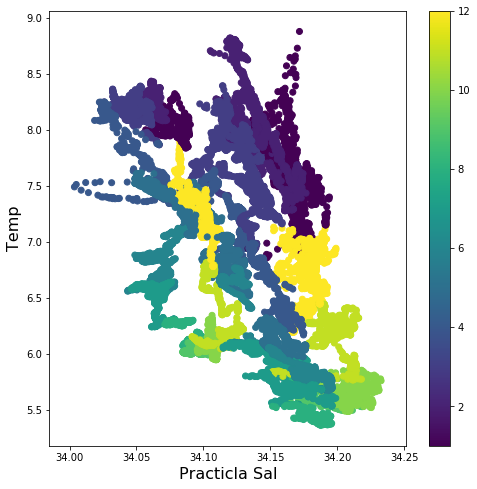

In [34]:
fig, ax = plt.subplots()
fig.set_size_inches(8,8)
cax = ax.scatter(df['practical_salinity'], df['temp'], c=df['month'])
plt.colorbar(cax)
ax.set_xlabel('Practicla Sal', size=16)
ax.set_ylabel('Temp', size=16)

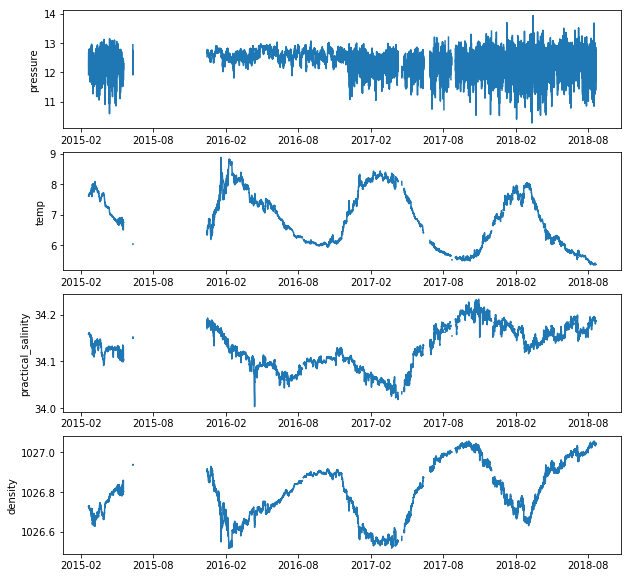

In [37]:
cols = ['pressure','temp','practical_salinity',"density"]
fig, ax = plt.subplots(len(cols))
fig.set_size_inches(w=10,h=2.5*len(cols))
for i,c in enumerate(cols):
    ax[i].plot(df['dateTime'],df[c])
    ax[i].set_ylabel(str(c))


In [74]:
daily = df.resample('1D').mean()

In [78]:
alt.renderers.enable('notebook')

RendererRegistry.enable('notebook')

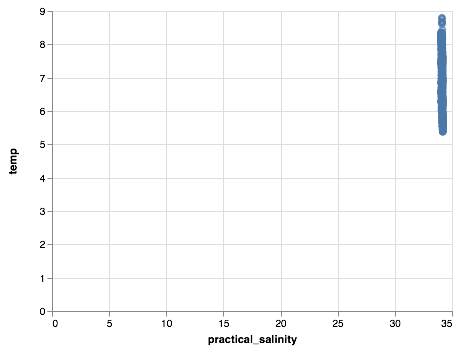

In [79]:
import altair as alt

# for the notebook only (not for JupyterLab) run this command once per session
alt.Chart(daily).mark_point().encode(
    x='practical_salinity',
    y='temp',
).int

In [80]:
import re

In [81]:
test_str = "\n//0\n//File updated on 08/09/2018 15:48\n//!! ADJUSTED DATA FILE !!\n//WMO ID: 5905367\n//Univ. of Washington ID: 12755\n//MBARI ID: 12755SOOCN\n//No missing float profiles\n//Missing Float position interpolated for station(s): 14 15 \n//Latitude quality flag = 4 for interpolated float positions\n//No position for station(s): 17 18 19 20 \n//Missing Float data detected for adjusted station(s): 17 18 19 20 \n//\n//FLOAT VARIABLES:\n//Variable Sensor Serial number Comment\n//Pressure[dbar] Sbe41cp 9025 \n//Temperature[�C] Sbe41cp 9025 \n//Salinity[pss] Sbe41cp 9025 \n//Sigma_theta[kg/m^3]   Potential density at the sea surface\n//Depth[m]   Depth calculated from pressure and latitude\n//Oxygen[�mol/kg] Aanderaa 4330 2673 \n//OxygenSat[%]   Calculation assumes atmospheric pressure= 1013.25 mbar\n//Nitrate[�mol/kg] ISUS Lamp#C6.A01.0068"

In [98]:
pattern = r'WMO ID: (\d+)'

In [99]:
match = re.search(pattern, test_str)

In [105]:
match.groups()[0]

'5905367'